In [1]:
class Operation():
    
    def __init__(self, input_nodes):
        
        self.input_nodes = input_nodes
        self.output_nodes = []
        
        for node in input_nodes:
            node.output_nodes.append(self)
            
        _default_graph.operations.append(self)
            
    def compute(self):
        pass

In [2]:
class Add(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
    
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return(x_var + y_var)

In [3]:
class Multiply(Operation):
    
    def __init__(self, x, y):
        
        super().__init__([x, y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return(x_var*y_var)
    
    

In [4]:
class MatMulti(Operation):
    
    def __init__(self, x, y):
        
        super().__init__(self, [x, y])
        
    def compute(self, x_var, y_var):
        self.inputs = [x_var, y_var]
        return(x_var.dot(y_var))

In [5]:
class PlaceHolder():
    
    def __init__(self):
        
        self.output_nodes = []
        
        _default_graph.placeholders.append(self)

In [6]:
class Variable():
    
    def __init__(self, initial_value = None):
        
        self.value = initial_value
        self.output_nodes = []
        
        _default_graph.variables.append(self)
        
        

In [7]:
_default_graph = None

class Graph():
    
    def __init__(self):
        
        self.operations = []
        self.placeholders = []
        self.variables = []
        
    def set_as_default(self):
        
        '''
        creates global variable _default_graph which is accessible outside this function so that it can be modified by other functions
        The global variable is the class object itself
        '''
        
        global _default_graph
        
        _default_graph = self

z = Ax + b
<br/>
A = 10
<br/>
b = 1
<br/>
z = 10x + 1

In [8]:
g = Graph()

In [9]:
g.set_as_default()


In [10]:
A = Variable(10)

In [11]:
b = Variable(1)

In [26]:
x = PlaceHolder()

In [143]:
y = Multiply(A, x)

In [145]:
z = Add(y,b)

### need to implement postorder traverse and session()

In [146]:
import tensorflow as tf

In [147]:
print(tf.__version__)

1.13.1


### tensorflow basics

### you can make tensorflow attributes, but these cannot be interacted with unless within a tensorflow session

In [148]:
hello = tf.constant('hello')

In [151]:
world = tf.constant('world')

In order to access the varriables one has to do do within a tensorflow session

In [167]:
with tf.Session() as sess:
    hello_py = sess.run(hello)
    


In [168]:
with tf.Session() as sess:
    hello_world_py = sess.run(hello + world)

In [171]:
print(hello_py)

b'hello'


In [172]:
print(hello_world_py)


b'helloworld'


tensorflow has a variety of object types that can be created by using different methods off of tensorflow such as tf.fill etc

In [173]:
filled_matrix = tf.fill((2,2),1)

In [175]:
with tf.Session() as sess:
    matrix_py = sess.run(filled_matrix)
    



In [176]:
print(matrix_py)

[[1 1]
 [1 1]]


An interactive tensor flow session can be started, this is only really useful for notebook environments

In [181]:
sessI = tf.InteractiveSession()

/Users/robbie.morse/anaconda3/lib/python3.7/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


<tf.Tensor 'Fill_1:0' shape=(2, 2) dtype=int32>

In [195]:
matrix_py_2 = tf.fill((2,2), 1)

In [183]:
print(sessI.run(matrix_py_2))

[[1 1]
 [1 1]]


close the interactive session

In [186]:
sessI.close()

In [191]:
mat_a = tf.constant([[1,2], [3,4]])

mat_b = tf.constant([[5,6], [7,8]])

my_operation = tf.matmul(mat_a, mat_b)

In [193]:
with tf.Session() as sess:
    
    result = sess.run(my_operation)

In [194]:
result

array([[19, 22],
       [43, 50]], dtype=int32)

variables: variables need to be initialised before running

In [210]:
my_data_structure = tf.constant([[1,2,3],[4,5,6]])
myvar = tf.Variable(my_data_structure)

Instructions for updating:
Colocations handled automatically by placer.


In [212]:
my_var_initialiser = tf.global_variables_initializer()

In [219]:
with tf.Session() as sess:
    
    sess.run(my_var_initialiser)
    a = sess.run(myvar)
print(a)

[[1 2 3]
 [4 5 6]]


placeholders can be set before the values are actually known, the shape must be defined, however the shape can be None as the shape may be found out at a later time

In [223]:
my_placeholder = tf.placeholder(dtype = tf.float32, shape = (None, 5))

### using feed dicts

In [225]:
import numpy as np

In [242]:
np.random.seed(101) 

In [243]:
tf.set_random_seed(101)

In [244]:
rand_a = np.random.uniform(0, 100, size = (5,5))


In [245]:
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [246]:
rand_b = np.random.uniform(0, 100, size = (5,1))

In [247]:
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [248]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [249]:
add_op = a + b
mult_op = a * b

In [250]:
with tf.Session() as sess:
    my_addition = sess.run(add_op, feed_dict = {a : rand_a, b : rand_b})



In [251]:
my_addition

array([[151.07166 , 156.49855 , 102.27921 , 116.58396 , 167.95949 ],
       [135.45622 ,  82.76316 , 141.42784 , 124.22093 ,  71.06043 ],
       [113.30171 ,  93.09215 ,  76.06819 , 136.43912 , 154.42728 ],
       [ 96.71727 ,  81.83804 , 133.83675 , 146.38118 , 101.10579 ],
       [122.72681 , 105.982925,  59.044632,  67.9831  ,  72.89292 ]],
      dtype=float32)

In [252]:
with tf.Session() as sess:
    my_multiplication = sess.run(mult_op, feed_dict = {a : rand_a, b : rand_b})


In [253]:
my_multiplication

array([[5134.644  , 5674.25   ,  283.12433, 1705.4707 , 6813.8315 ],
       [4341.8125 , 1598.267  , 4652.734  , 3756.8293 ,  988.94635],
       [3207.8113 , 2038.1029 , 1052.7742 , 4546.9805 , 5588.1157 ],
       [1707.379  ,  614.02527, 4434.989  , 5356.7773 , 2029.8555 ],
       [3714.0984 , 2806.6438 ,  262.76764,  747.19855, 1013.292  ]],
      dtype=float32)

In [276]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, +1.5, 10)

In [277]:
x_data

array([-0.82819019,  1.33672637,  1.0835232 ,  3.33368347,  3.35847315,
        4.21398076,  5.70149743,  7.60488217, 10.02165086, 11.34779239])

In [278]:
y_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, +1.5, 10)

In [279]:
y_data

array([-0.06549775,  0.99446914,  2.63408932,  2.80715732,  3.29717872,
        4.20885854,  7.07964263,  8.71457546,  9.39967015, 10.45530311])

In [280]:
import matplotlib.pyplot as plt
%matplotlib inline

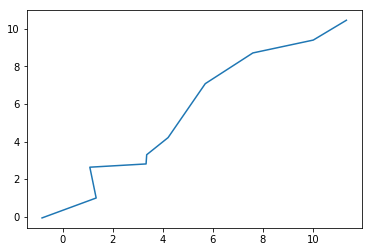

In [281]:
plt.plot(x_data, y_data)

fitting y = mx + b

need to make some starting weights as variables, these will change

In [284]:
m = tf.Variable(np.random.rand(1))
b = tf.Variable(np.random.rand(1))

In [287]:
def calc_error(x_data, y_data):
    error = 0
    for x, y in zip(x_data, y_data):
        y_pred = m * x + b
        
        error += (y_pred-y)**2
    return(error)

In [291]:
error = calc_error(x_data, y_data)

In [292]:
error

<tf.Tensor 'add_25:0' shape=(1,) dtype=float64>

In [293]:
optimiser= tf.train.GradientDescentOptimizer(learning_rate=0.05)

In [294]:
init = tf.global_variables_initializer()

In [295]:
train = optimiser.minimize(error)

In [300]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

In [301]:
final_intercept

array([-1.51318246e+154])

In [302]:
final_slope

array([-1.15326309e+155])